Q1: What is unsupervised learning in the context of machine learning?
Ans: Unsupervised learning is a type of machine learning where the model is given unlabeled data and must find hidden patterns or intrinsic structures within it. Common tasks include clustering, dimensionality reduction, and association rule learning.

Q2: How does K-Means clustering algorithm work?
Ans: K-Means partitions data into k clusters by:

Initializing k centroids randomly

Assigning each data point to the nearest centroid

Updating centroids as the mean of assigned points

Repeating steps 2–3 until convergence

Q3: Explain the concept of a dendrogram in hierarchical clustering.
Ans: A dendrogram is a tree-like diagram showing the arrangement of clusters formed by hierarchical clustering. It illustrates how clusters are merged or split at each step and helps determine the optimal number of clusters by cutting the tree at a specific height.

Q4: What is the main difference between K-Means and Hierarchical Clustering?
Ans: K-Means requires a predefined number of clusters (k), is faster, and uses iterative optimization. Hierarchical clustering does not require predefined k, creates a tree of clusters, and is more interpretable but slower on large datasets.

Q5: What are the advantages of DBSCAN over K-Means?
Ans:

Can find arbitrarily shaped clusters

Automatically detects noise/outliers

Doesn’t require specifying the number of clusters

Works better on data with uneven density

Q6: When would you use Silhouette Score in clustering?
Ans: Silhouette Score is used to evaluate the quality of clustering by measuring how well each point fits within its cluster compared to others. It’s used to compare clustering models or k values and validate the cohesion and separation of clusters.

Q7: What are the limitations of Hierarchical Clustering?
Ans:

Computationally expensive (O(n³) time complexity)

Sensitive to outliers and noise

Once merged or split, cannot be undone

Difficult to scale for large datasets

Q8: Why is feature scaling important in clustering algorithms like K-Means?
Ans: K-Means uses Euclidean distance, which is sensitive to feature magnitude. Without scaling, features with larger ranges dominate and distances become misleading. Standardization or normalization ensures fair contribution from all features.

Q9: How does DBSCAN identify noise points?
Ans: In DBSCAN, points that do not have enough neighbors (min_samples) within a given radius (eps) are considered noise (labeled -1). These points are not part of any cluster.

Q10: Define inertia in the context of K-Means.
Ans: Inertia is the sum of squared distances of each point to its assigned cluster centroid. Lower inertia indicates tighter clusters. However, inertia always decreases with increasing k, so it’s not a standalone evaluation metric.

Q11: What is the elbow method in K-Means clustering?
Ans: The elbow method plots inertia versus number of clusters (k). The "elbow point" (where the decrease in inertia slows down) indicates an optimal k—beyond which adding clusters doesn’t significantly improve performance.

Q12: Describe the concept of "density" in DBSCAN.
Ans: Density refers to the number of points within a specified radius (eps). If a point has at least min_samples within eps, it’s a core point. Clusters are formed from densely connected core points.

Q13: Can hierarchical clustering be used on categorical data?
Ans: Yes, but not with Euclidean distance. Use Gower or Hamming distance, or transform categories via one-hot encoding. Hierarchical clustering works with custom distance matrices suitable for categorical data.

Q14: What does a negative Silhouette Score indicate?
Ans: A negative score means the sample is closer to another cluster than to its own, indicating poor clustering or a misclassified sample.

Q15: Explain the term "linkage criteria" in hierarchical clustering.
Ans: Linkage criteria determine how distances between clusters are computed:

Single linkage: Minimum distance

Complete linkage: Maximum distance

Average linkage: Mean distance

Ward’s method: Minimizes variance increase when merging

Q16: Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
Ans: K-Means assumes equal-sized, spherical clusters and uniform density. When clusters differ in size, shape, or density, K-Means misclassifies points, leading to inaccurate clustering.

Q17: What are the core parameters in DBSCAN, and how do they influence clustering?
Ans:

eps (epsilon): Neighborhood radius

min_samples: Minimum number of points required to form a core point
These define cluster density. A smaller eps detects tighter clusters, while larger values may merge clusters or reduce noise detection.

Q18: How does K-Means++ improve upon standard K-Means initialization?
Ans: K-Means++ initializes centroids by selecting initial points far apart from each other, increasing the chance of better separation. This leads to faster convergence and better clustering results.

Q19: What is agglomerative clustering?
Ans: Agglomerative clustering is a bottom-up hierarchical method that starts with each data point as a single cluster, then iteratively merges the closest pair of clusters until one cluster remains.

Q20: What makes Silhouette Score a better metric than just inertia for model evaluation?
Ans: Inertia only measures within-cluster compactness. Silhouette Score considers both cohesion (within-cluster similarity) and separation (between-cluster dissimilarity), providing a more balanced evaluation of clustering performance.

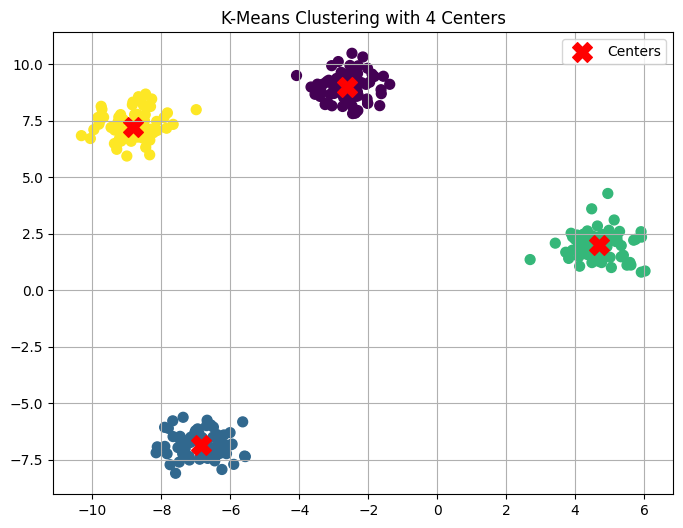

In [ ]:
#Q21
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centers')
plt.title("K-Means Clustering with 4 Centers")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Q22
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

print("First 10 predicted labels:", labels[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


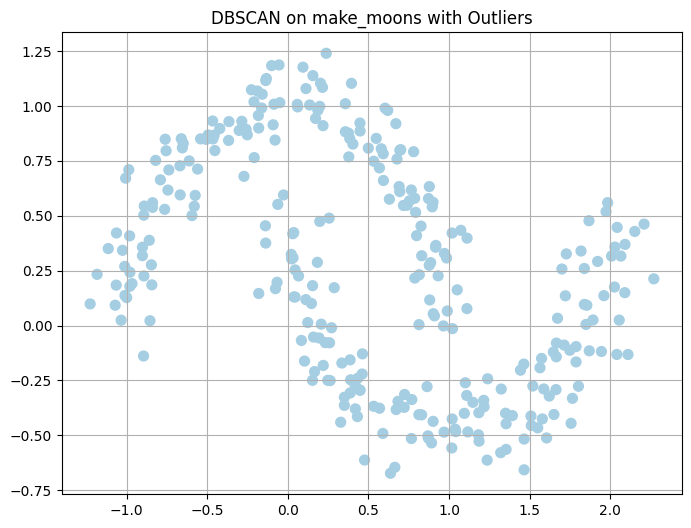

In [ ]:
#Q23
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', s=50)
plt.title("DBSCAN on make_moons with Outliers")
plt.grid(True)
plt.show()

In [ ]:
#Q24
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

data = load_wine()
X = StandardScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


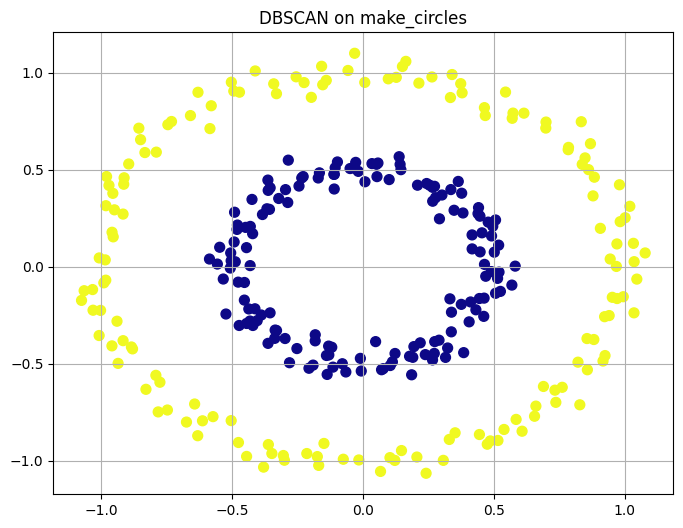

In [ ]:
#Q25
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN on make_circles")
plt.grid(True)
plt.show()

In [ ]:
#Q26
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.feature_names)
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal dimension  
0  

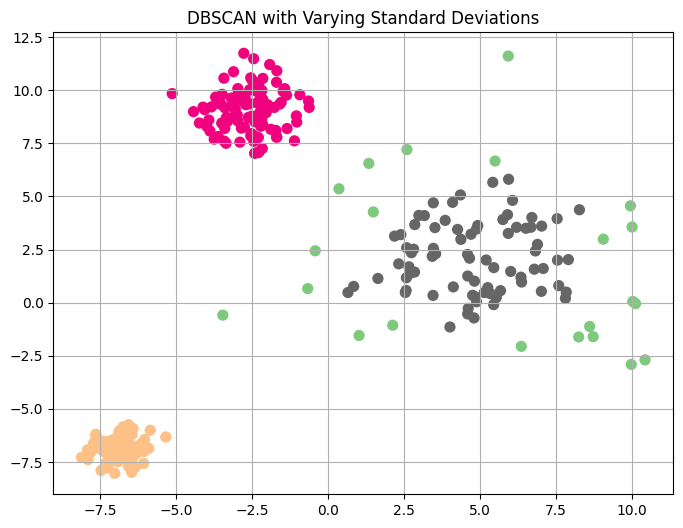

In [ ]:
#Q27
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("DBSCAN with Varying Standard Deviations")
plt.grid(True)
plt.show()

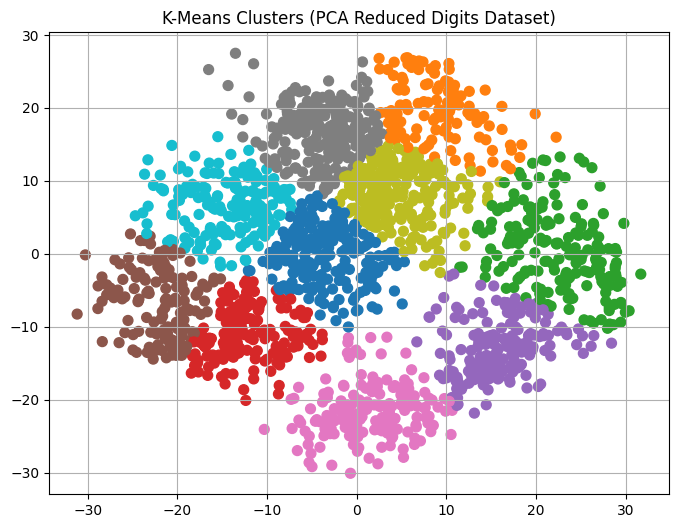

In [ ]:
#Q28
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.title("K-Means Clusters (PCA Reduced Digits Dataset)")
plt.grid(True)
plt.show()

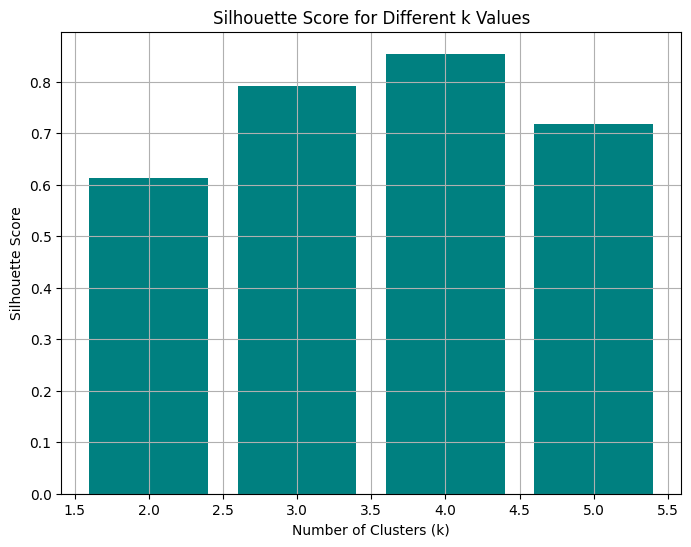

In [ ]:
#Q29
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=42)

scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.figure(figsize=(8, 6))
plt.bar(k_values, scores, color='teal')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()


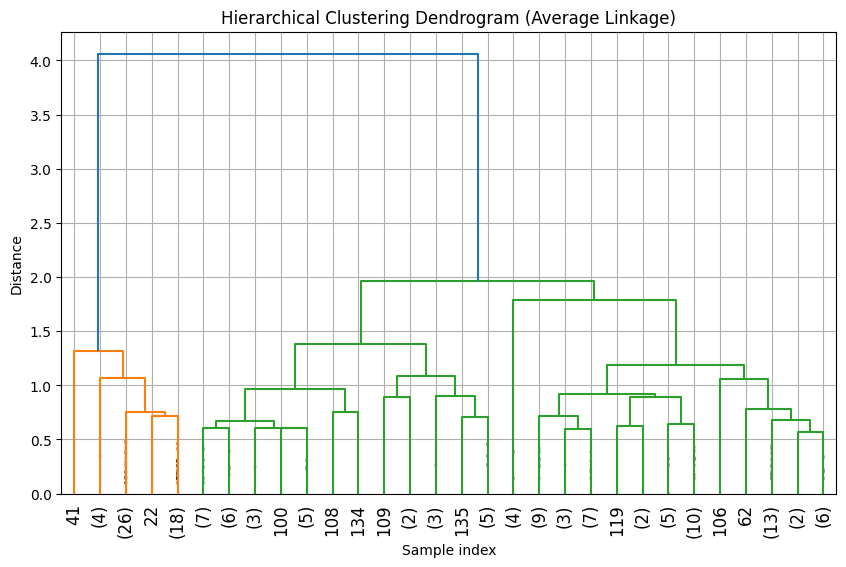

In [ ]:
#Q30
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

Z = linkage(X, method='average')

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


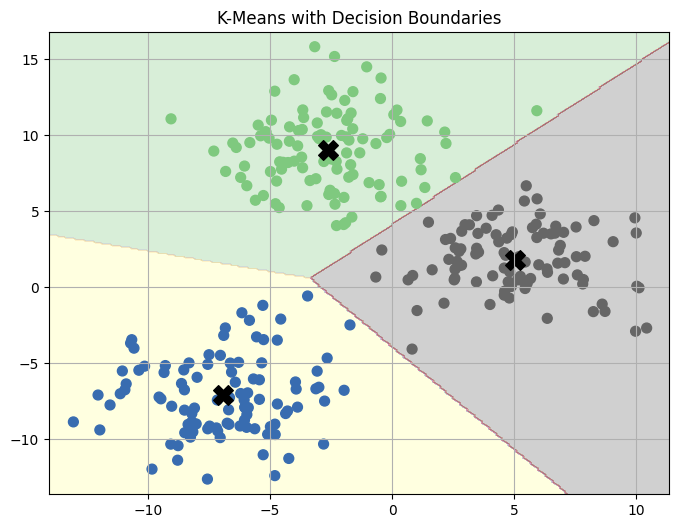

In [ ]:
#Q31
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X')
plt.title("K-Means with Decision Boundaries")
plt.grid(True)
plt.show()


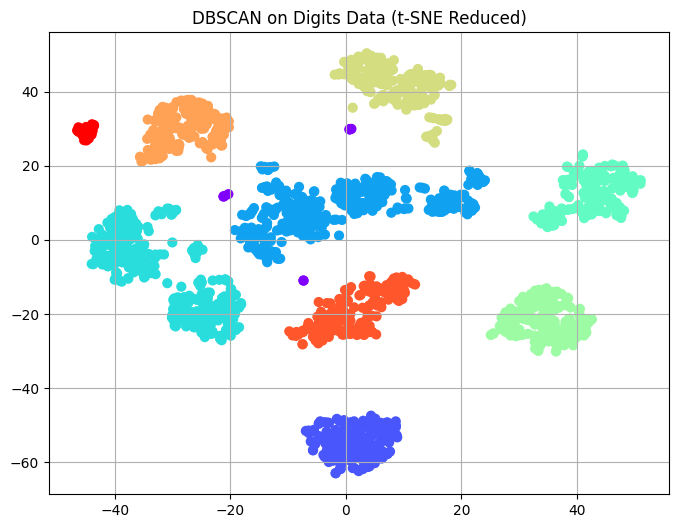

In [ ]:
#Q32
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='rainbow', s=40)
plt.title("DBSCAN on Digits Data (t-SNE Reduced)")
plt.grid(True)
plt.show()


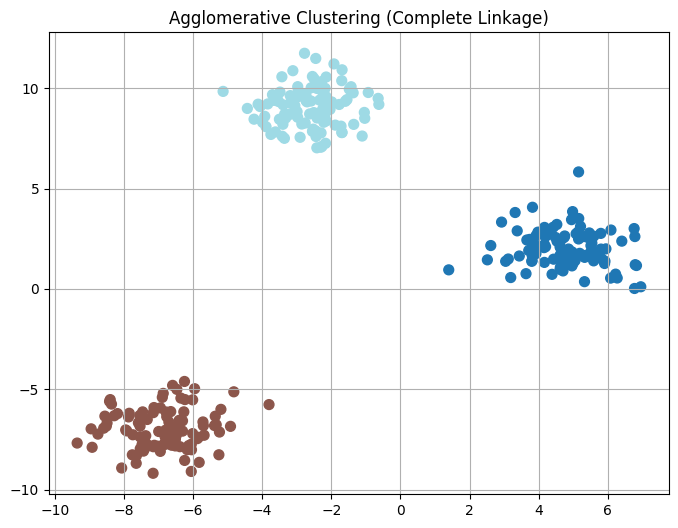

In [ ]:
#Q33
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

agglo = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=50)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.grid(True)
plt.show()


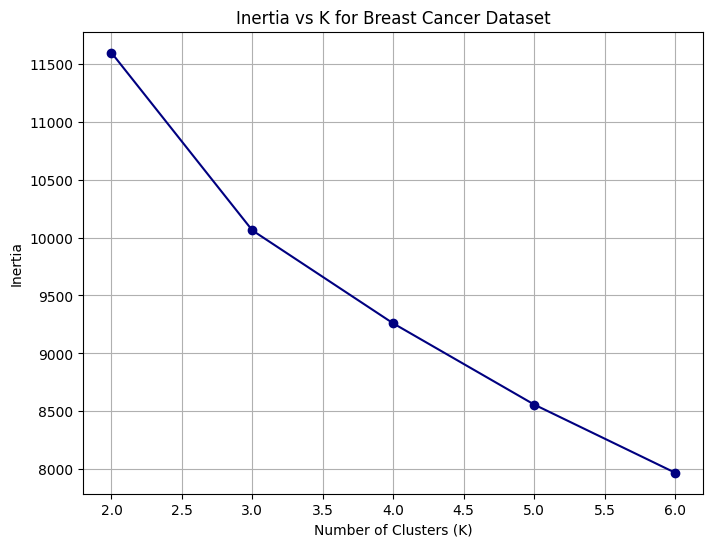

In [ ]:
#Q34
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = load_breast_cancer().data
X_scaled = StandardScaler().fit_transform(X)

inertias = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 7), inertias, marker='o', color='navy')
plt.title("Inertia vs K for Breast Cancer Dataset")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


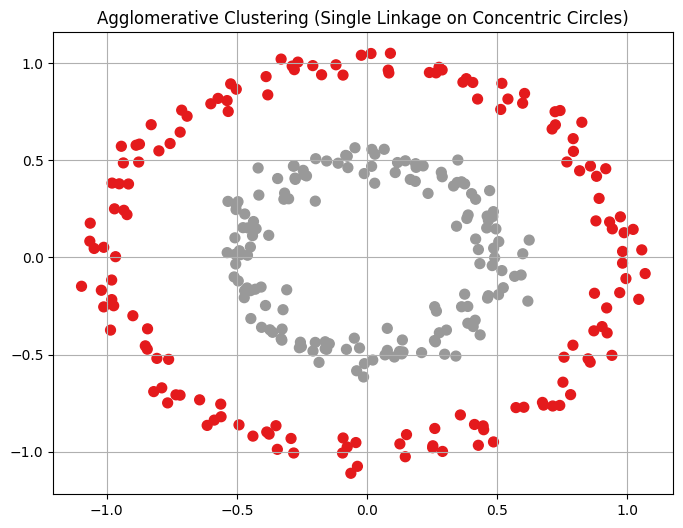

In [ ]:
#Q35
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.title("Agglomerative Clustering (Single Linkage on Concentric Circles)")
plt.grid(True)
plt.show()


In [ ]:
#Q36
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X = load_wine().data
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


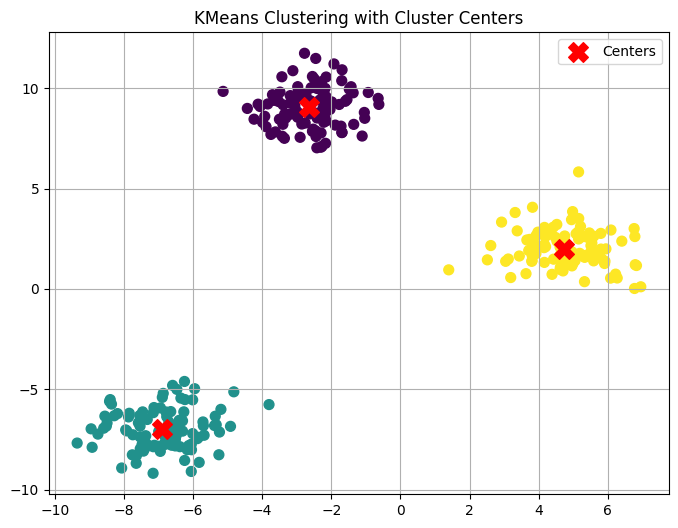

In [ ]:
#Q37
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title("KMeans Clustering with Cluster Centers")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Q38
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = load_iris().data
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

noise_count = list(labels).count(-1)
print("Number of noise samples:", noise_count)


Number of noise samples: 34


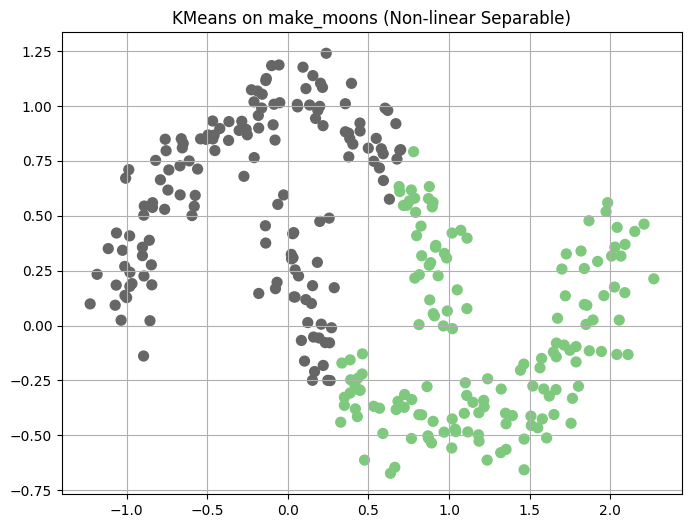

In [ ]:
#Q39
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("KMeans on make_moons (Non-linear Separable)")
plt.grid(True)
plt.show()


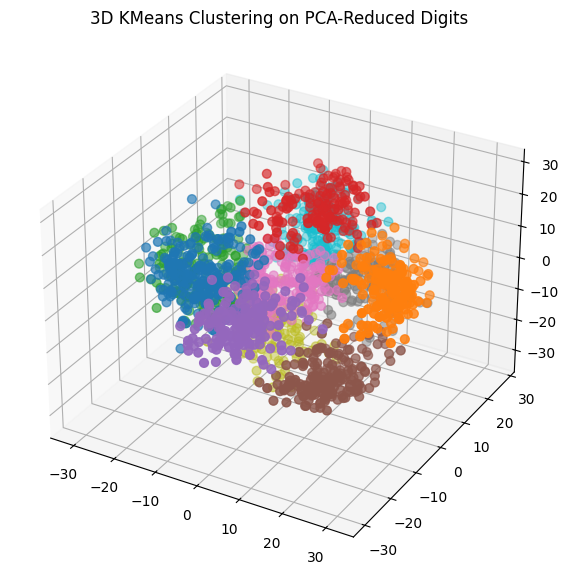

In [ ]:
#Q40
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = load_digits().data
X_pca = PCA(n_components=3).fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=40)
ax.set_title("3D KMeans Clustering on PCA-Reduced Digits")
plt.show()


In [ ]:
#Q41
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score for 5 Clusters:", score)


Silhouette Score for 5 Clusters: 0.6786441315351273


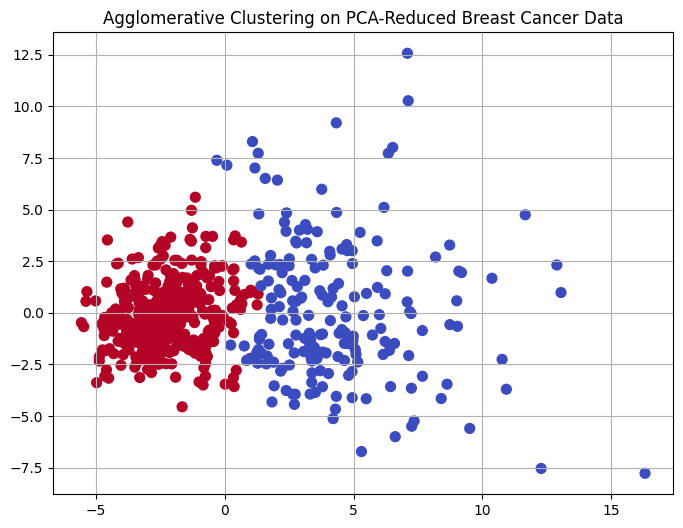

In [ ]:
#Q42
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = load_breast_cancer().data
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', s=50)
plt.title("Agglomerative Clustering on PCA-Reduced Breast Cancer Data")
plt.grid(True)
plt.show()


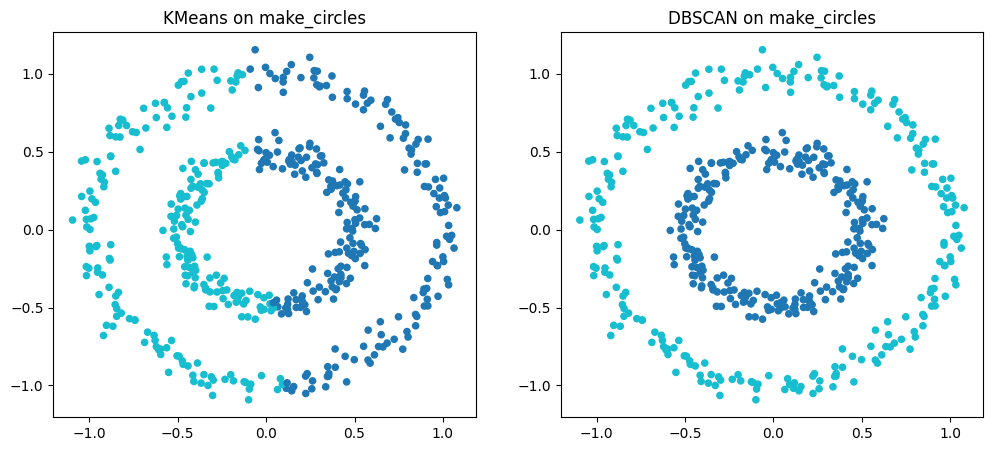

In [ ]:
#Q43
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X)
dbscan = DBSCAN(eps=0.2).fit(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab10', s=20)
plt.title("KMeans on make_circles")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='tab10', s=20)
plt.title("DBSCAN on make_circles")

plt.show()


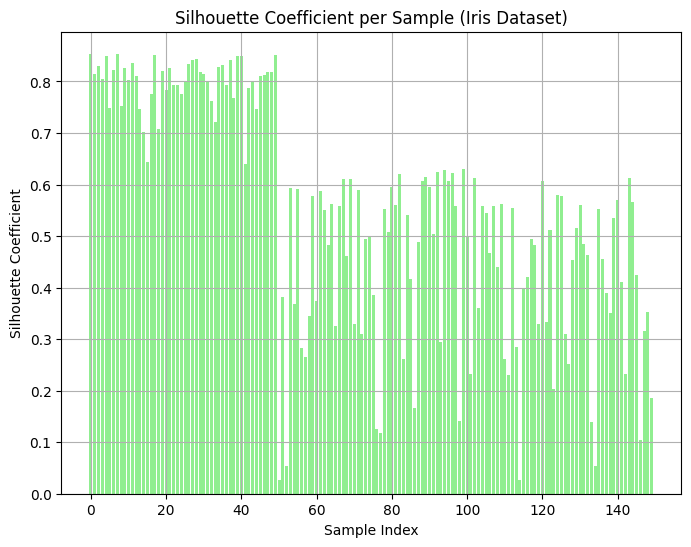

In [ ]:
#Q44
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

X = load_iris().data

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, labels)

plt.figure(figsize=(8, 6))
plt.bar(range(len(silhouette_vals)), silhouette_vals, color='lightgreen')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient per Sample (Iris Dataset)')
plt.grid(True)
plt.show()


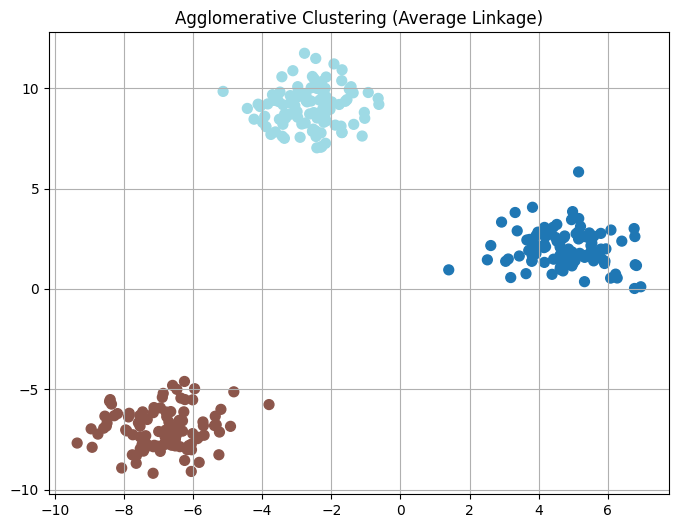

In [ ]:
#Q45
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

agglo = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=50)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.grid(True)
plt.show()


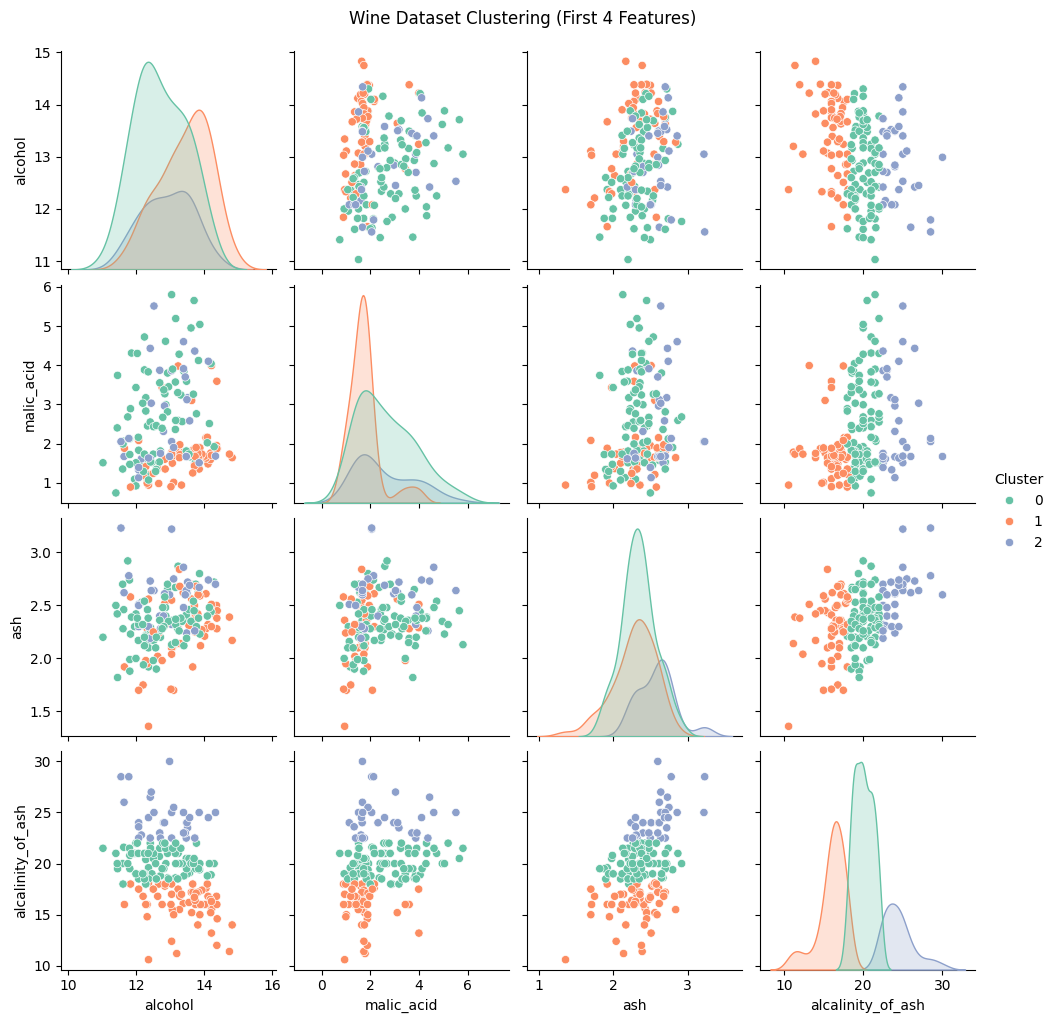

In [ ]:
#Q46
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

data = load_wine()
df = pd.DataFrame(data.data[:, :4], columns=data.feature_names[:4])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

sns.pairplot(df, hue='Cluster', palette='Set2')
plt.suptitle("Wine Dataset Clustering (First 4 Features)", y=1.02)
plt.show()


In [ ]:
#Q47
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster and noise point counts:", dict(zip(unique, counts)))


Cluster and noise point counts: {np.int64(-1): np.int64(11), np.int64(0): np.int64(163), np.int64(1): np.int64(161), np.int64(2): np.int64(165)}


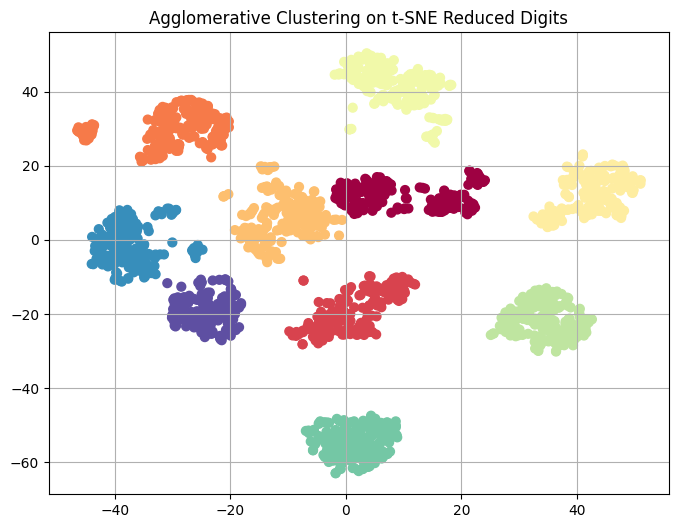

In [ ]:
#Q48
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

agglo = AgglomerativeClustering(n_clusters=10)
labels = agglo.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Spectral', s=40)
plt.title("Agglomerative Clustering on t-SNE Reduced Digits")
plt.grid(True)
plt.show()
